In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [26]:
gender = "/content/drive/MyDrive/notebooks /gender_classification_v7.csv"
Gender = pd.read_csv(gender)

In [27]:
#print the 5 first row
Gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [28]:
#print the last 5 rows.
Gender.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [29]:
#check for Na
Gender.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [30]:
#check the datatype of each feature.
Gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [31]:
#check for number of columns and rows.
Gender.shape

(5001, 8)

<ipython-input-32-6d0996852424>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Gender.corr())


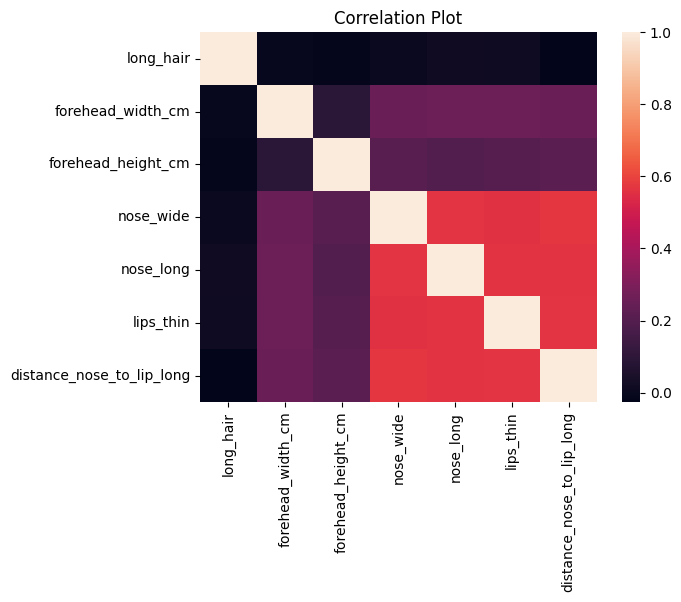

In [32]:
#create a correlation matrix to check which features have a stronger correlation.
sns.heatmap(Gender.corr())
plt.title('Correlation Plot')
plt.show()

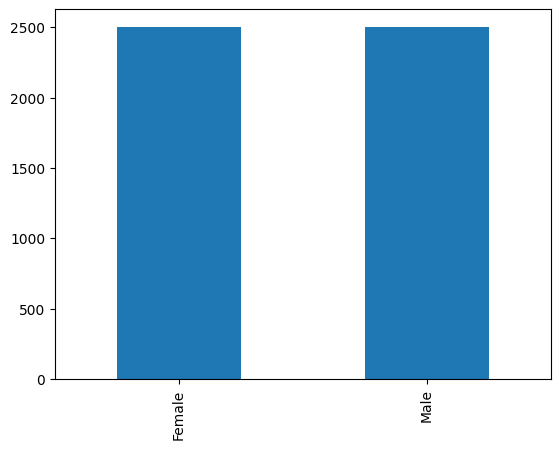

In [33]:
Gender['gender'].value_counts().plot(kind='bar');

We can see the amount of females and males are equal.

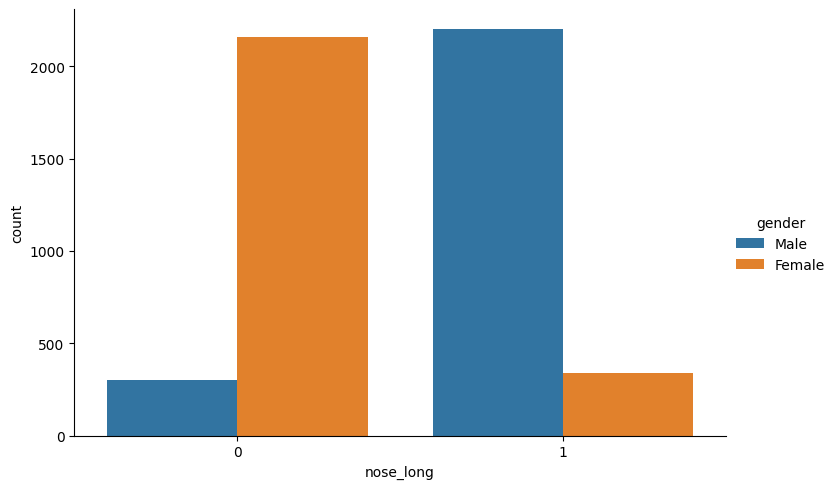

In [34]:
sns.catplot(
    data=Gender,
    x='nose_long',
    kind='count',
    hue='gender',
    aspect=1.5
)
plt.show()

Individuals with longer noses are usually males and individuals with smaller noses are usually female.

In [35]:
df = Gender

In [36]:
Y=df['gender']
X=df.drop(['gender'],axis=1)

Splitting the Dataset into Training and Test Sets

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state=0)

Feature Scaling - One method to rescale data is to standardize it. To standardize a dataset means to scale all of the values in the dataset such that the mean value is 0 and the standard deviation is 1.

In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting (Training) the model to the training dataset

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Note: here we are calling our KNN model knn. In the titantic example, we called our model lr. This is your choice.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

#We are using a Gaussian distribution for the Naive Bayes classifier hence we chose the GaussianNB model.
#For a list of other distributions, see here: https://scikit-learn.org/stable/modules/naive_bayes.html
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

Performing 5-Fold Cross Validation for KNN

In [40]:
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9634285714285715


Performing 5-Fold Cross Validation for GNB

In [41]:
#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9714285714285713


Performing Stratified 10-Fold Cross Validation for KNN

In [42]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)

In [43]:
result = cross_val_score(knn, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9654285714285715


Performing Stratified 10-Fold Cross Validation for GNB

In [44]:
#Note we don't need to import the StratifiedKfold library again as it was done previously
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9714285714285715


KNN - Using the model to make predictions on the test dataset

In [45]:
# Predicting the Test set results
y_pred_knn = knn.predict(X_test)


GNB - Using the model to make predictions on the test dataset

In [46]:
# Predicting the Test set results
y_pred_gnb = gnb.predict(X_test)


KNN - Classification Report

In [47]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

      Female       0.96      0.97      0.97       764
        Male       0.97      0.96      0.97       737

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



GNB - Classification Report

In [48]:
#Note - no need to import the classification_report libary again as it was done in the cell above
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

      Female       0.97      0.98      0.97       764
        Male       0.98      0.96      0.97       737

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

